In [72]:
import os
import time
import numpy as np
import pandas as pd

from radar_object_tracking.radarprocessing.radar_fd_textdata_parser import read_columns

runNumber = 7
directory_to_process = f"data/radar/run{runNumber}-FD"
fd_data = []

def process_data_from_folder(self):
        
        # List all files in the directory
        files = os.listdir(directory_to_process)
        
        # Filter the files based on the naming convention
        txt_files = [f for f in files if f.startswith('trial') and f.endswith('.txt')]
        
        # Sort the files if needed (optional)
        txt_files.sort()
        
        # Process each file one by one
        for file_name in txt_files:
            file_path = os.path.join(directory_to_process, file_name)
            
            # print(f"Processing file: {file_path}")
            new_fd_data = read_columns(file_path)
            fd_data.append(new_fd_data.fd_data)

In [73]:
process_data_from_folder(directory_to_process)
fd_data = np.array(fd_data)

I1_data = fd_data[:, :, 0]  # Extract the I1 signal, which is the first column across all frames and range bins  # Extract the first column, which corresponds to I1
Q1_data = fd_data[:, :, 1]  # Extract the Q1 signal, which is the second column across all frames and range bins
I2_data = fd_data[:, :, 2]  # Extract the I2 signal, which is the third column across all frames and range bins
Q2_data = fd_data[:, :, 3]  # Extract the Q2 signal, which is the fourth column across all frames and



In [36]:
print(fd_data.shape)

(1082, 513, 8)


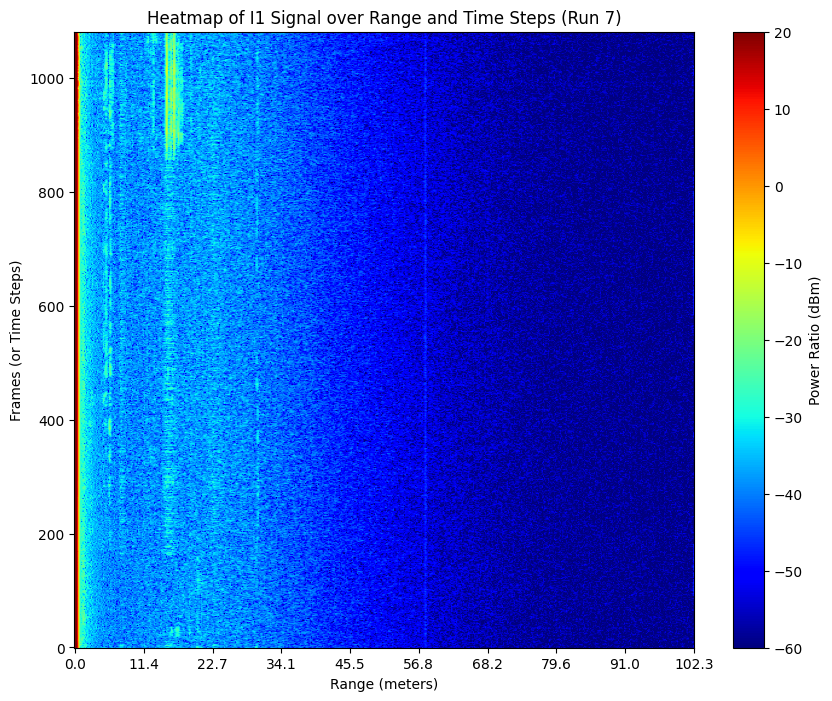

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 0.2 meters per range bin
RANGE_BIN_RESOLUTION = 0.199861  # in meters

# Calculate the actual range bin distances (indices multiplied by range resolution)
range_bin_distances = np.arange(I1_data.shape[1]) * RANGE_BIN_RESOLUTION  # Shape[1] is the number of range bins (512) #viridis

plt.figure(figsize=(10, 8))

# Plot the heatmap with the dBm scale from -60 to 20
plt.imshow(I1_data, aspect='auto', cmap='jet', vmin=-60, vmax=20)

# Add a colorbar with a label
plt.colorbar(label='Power Ratio (dBm)')

# Set the x-axis labels to be the actual distances
plt.xticks(ticks=np.linspace(0, I1_data.shape[1] - 1, num=10),  # Choose 10 ticks for readability
           labels=np.round(np.linspace(range_bin_distances[0], range_bin_distances[-1], num=10), 1))  # Rounded to 1 decimal

# Set labels for the axes
plt.xlabel('Range (meters)')
plt.ylabel('Frames (or Time Steps)')

# Reverse the direction of the y-axis
plt.gca().invert_yaxis()

# Optional: Set a title
plt.title(f"Heatmap of I1 Signal over Range and Time Steps (Run {runNumber})")

# Show the plot
plt.show()


In [75]:
import numpy as np

def moving_average(data, window_size):
    """Apply a moving average to each column of the 2D array."""
    return np.apply_along_axis(lambda x: np.convolve(x, np.ones(window_size) / window_size, mode='same'), axis=0, arr=data)

# Choose a window size for the moving average (larger = more smoothing)
window_size = 4

# Apply the moving average across each range bin (column) of I1_data
I1_data_smoothed = moving_average(I1_data, window_size)


In [39]:
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian smoothing to each range bin (column) of I1_data
sigma = 0.8  # Standard deviation for Gaussian kernel (higher = more smoothing)
I1_data_smoothed_gaussian = gaussian_filter1d(I1_data, sigma=sigma, axis=0)  # Smooth along frames (axis=0)

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def plot_I1_heatmap(I1_data, range_bin_resolution=0.2, min_range=0, max_range=50, vmin=-60, vmax=20, title='Heatmap of I1 Signal'):
    """
    Plots a heatmap of the I1 signal over range bins and frames, with y-axis running from min_range to max_range.

    Parameters:
    I1_data (2D array): The I1 data to plot (frames x range bins).
    range_bin_resolution (float): The resolution of range bins in meters.
    min_range (float): The minimum range (in meters) to plot.
    max_range (float): The maximum range (in meters) to plot.
    vmin (float): Minimum dBm value for color scale.
    vmax (float): Maximum dBm value for color scale.
    title (str): Title for the plot.
    """
    # Calculate the actual range bin distances
    range_bin_distances = np.arange(I1_data.shape[1]) * range_bin_resolution

    # Find the index where the range exceeds the minimum and maximum ranges
    min_range_index = np.where(range_bin_distances >= min_range)[0][0]
    max_range_index = np.where(range_bin_distances > max_range)[0][0]

    # Slice the data between the desired min and max range
    range_bin_distances = range_bin_distances[min_range_index:max_range_index]
    I1_data_sliced = I1_data[:, min_range_index:max_range_index]  # Slice the I1 data accordingly
    frames = np.arange(I1_data.shape[0])  # Shape[0] is the number of frames (rows)

    plt.figure(figsize=(10, 8))

    # Use pcolormesh to create a heatmap-like grid without blending
    plt.pcolormesh(range_bin_distances, frames, I1_data_sliced, cmap='jet', vmin=vmin, vmax=vmax, shading='auto')

    # Add a colorbar with a label
    plt.colorbar(label='Power Ratio (dBm)')

    # Set the x-axis labels to be the actual distances
    plt.xlabel('Range (meters)')
    plt.ylabel('Frames (or Time Steps)')

    # Set the title
    plt.title(title)

    # Show the plot
    plt.show()




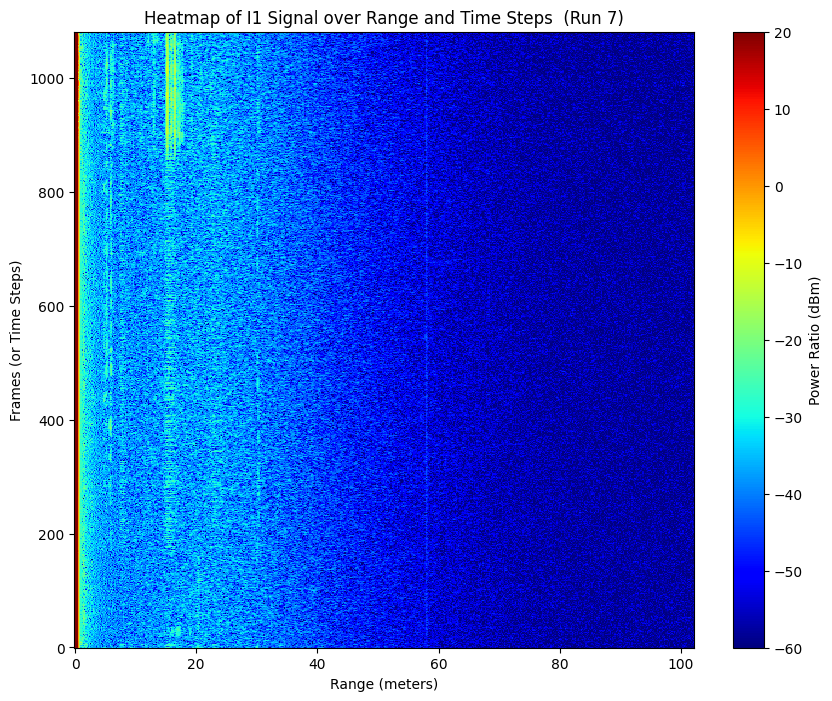

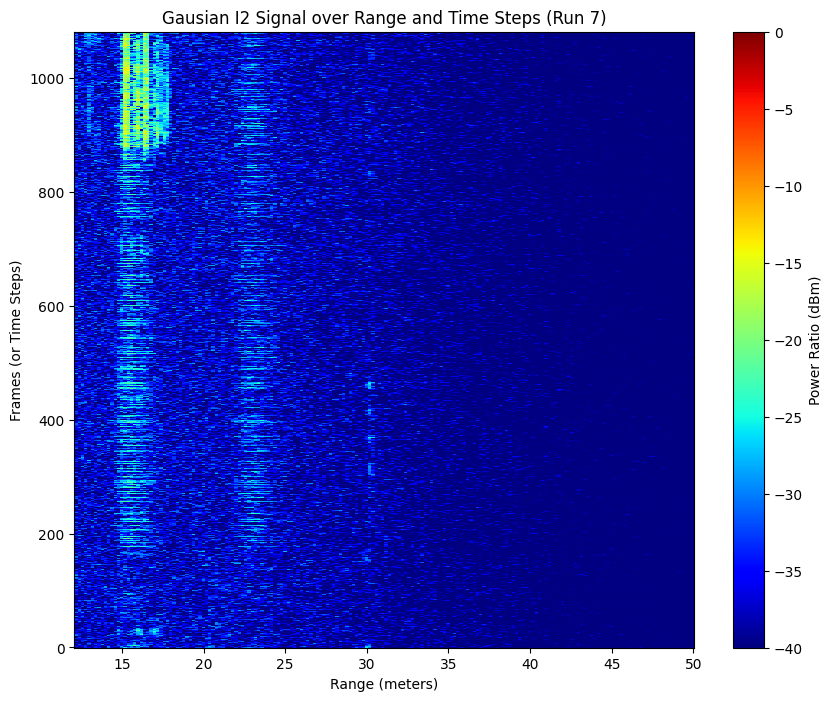

In [83]:
plot_I1_heatmap(I1_data, range_bin_resolution=RANGE_BIN_RESOLUTION, max_range=102.3, title=f"Heatmap of I1 Signal over Range and Time Steps  (Run {runNumber})")
# plot_I1_heatmap(I1_data_smoothed, range_bin_resolution=0.2, max_range=50, title='Smoothed I1 Heatmap')
plot_I1_heatmap(I1_data, range_bin_resolution=RANGE_BIN_RESOLUTION, vmin=-40, vmax=0, min_range=12, max_range=50, title=f"Gausian I1 Signal over Range and Time Steps (Run {runNumber})")
plot_I1_heatmap(I2_data, range_bin_resolution=RANGE_BIN_RESOLUTION, vmin=-40, vmax=0, min_range=12, max_range=50, title=f"Gausian I2 Signal over Range and Time Steps (Run {runNumber})")



In [85]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal_power(I1_data, Q1_data, range_bin_resolution=0.2, min_range=0, max_range=50, vmin=0, vmax=80, title='Heatmap of Rx1 Signal Power'):
    """
    Plots a heatmap of the Rx1 signal power (magnitude of I1 and Q1) over range bins and frames.

    Parameters:
    I1_data (2D array): The I1 signal data to plot (frames x range bins).
    Q1_data (2D array): The Q1 signal data to plot (frames x range bins).
    range_bin_resolution (float): The resolution of range bins in meters.
    min_range (float): The minimum range (in meters) to plot.
    max_range (float): The maximum range (in meters) to plot.
    vmin (float): Minimum dBm value for color scale.
    vmax (float): Maximum dBm value for color scale.
    title (str): Title for the plot.
    """
    # Compute the signal power (magnitude of I1 and Q1)
    signal_power = np.sqrt(I1_data**2 + Q1_data**2)

    # Calculate the actual range bin distances
    range_bin_distances = np.arange(signal_power.shape[1]) * range_bin_resolution
    
    # Find the indices where the range is within the specified min and max ranges
    min_range_index = np.where(range_bin_distances >= min_range)[0][0]
    max_range_index = np.where(range_bin_distances > max_range)[0][0]

    # Slice the data between the desired minimum and maximum ranges
    range_bin_distances = range_bin_distances[min_range_index:max_range_index]
    signal_power_sliced = signal_power[:, min_range_index:max_range_index]  # Slice the signal power accordingly
    frames = np.arange(signal_power.shape[0])  # Shape[0] is the number of frames (rows)

    plt.figure(figsize=(10, 8))

    # Use pcolormesh to create a heatmap-like grid without blending
    plt.pcolormesh(range_bin_distances, frames, signal_power_sliced, cmap='jet', vmin=vmin, vmax=vmax, shading='auto')

    # Add a colorbar with a label
    plt.colorbar(label='Signal Power (dBm)')

    # Set the x-axis labels to be the actual distances
    plt.xlabel('Range (meters)')
    plt.ylabel('Frames (or Time Steps)')

    # Set the title
    plt.title(title)

    # Show the plot
    plt.show()




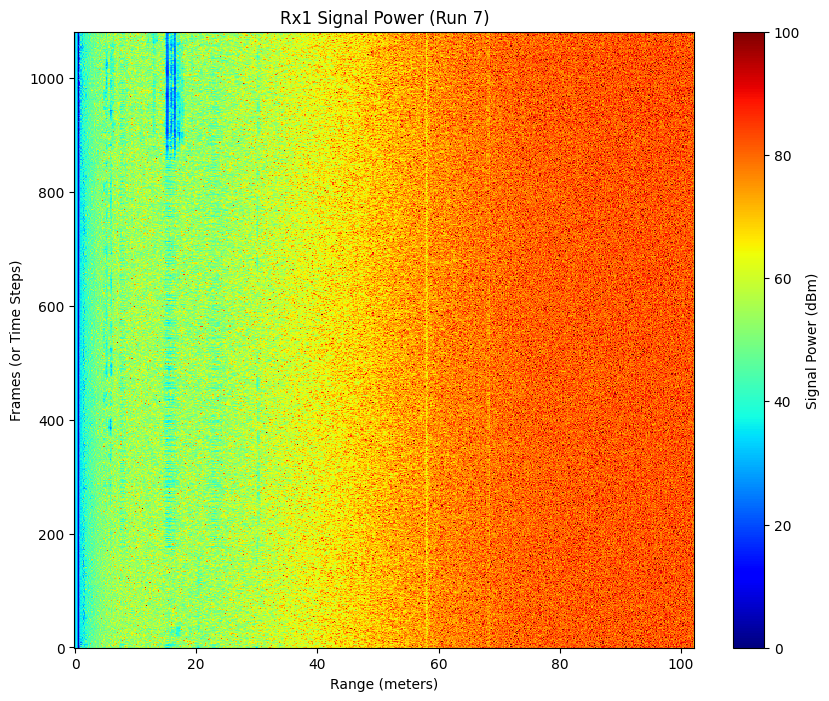

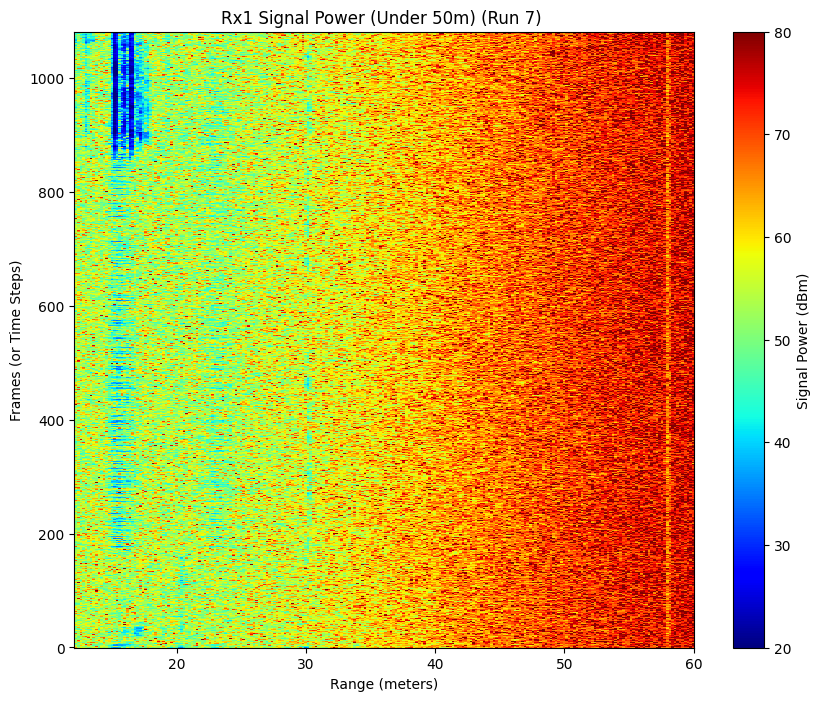

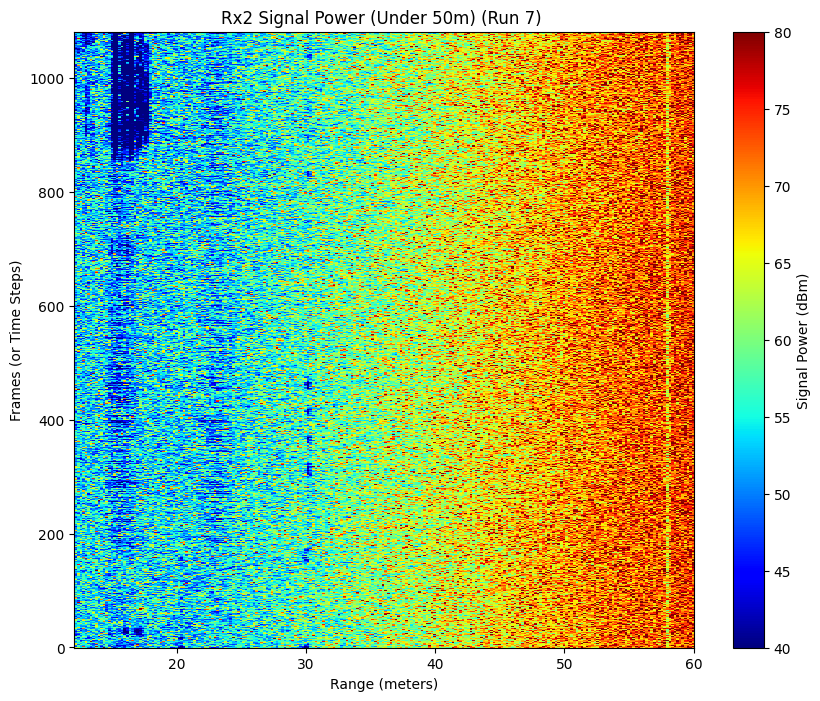

In [100]:
# Assuming fd_data is your data with shape (343, 512, 8), containing I1 and Q1 signals
plot_signal_power(I1_data, Q1_data, range_bin_resolution=RANGE_BIN_RESOLUTION, max_range=102.3, title=f'Rx1 Signal Power (Run {runNumber})', vmax=100)
plot_signal_power(I1_data, Q1_data, range_bin_resolution=RANGE_BIN_RESOLUTION, min_range=12, max_range=60, title=f'Rx1 Signal Power (Under 50m) (Run {runNumber}) ',vmin=20, vmax=80)

plot_signal_power(I2_data, Q2_data, range_bin_resolution=RANGE_BIN_RESOLUTION, min_range=12, max_range=60, title=f'Rx2 Signal Power (Under 50m) (Run {runNumber}) ', vmin=40, vmax=80)


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

def plot_rx1_signal_power(fd_data, range_bin_resolution=0.2, max_range=50, vmin=0, vmax=60, sigma=1, title='Heatmap of Rx1 Signal Power (Smoothed)'):
    """
    Plots a heatmap of the Rx1 signal power (magnitude of I1 and Q1) over range bins and frames with Gaussian smoothing.

    Parameters:
    fd_data (2D array): The data containing I1 and Q1 signals (frames x range bins x 8).
    range_bin_resolution (float): The resolution of range bins in meters.
    max_range (float): The maximum range (in meters) to plot.
    vmin (float): Minimum dBm value for color scale.
    vmax (float): Maximum dBm value for color scale.
    sigma (float): Standard deviation for Gaussian kernel (higher = more smoothing).
    title (str): Title for the plot.
    """
    # Extract the I1 and Q1 signals
    I1_data = fd_data[:, :, 0]  # I1 is the first signal
    Q1_data = fd_data[:, :, 1]  # Q1 is the third signal

    # Compute the signal power (magnitude of I1 and Q1)
    signal_power = np.sqrt(I1_data**2 + Q1_data**2)

    # Apply Gaussian smoothing to each range bin (column) of the signal power
    signal_power_smoothed = gaussian_filter1d(signal_power, sigma=sigma, axis=0)

    # Calculate the actual range bin distances
    range_bin_distances = np.arange(signal_power.shape[1]) * range_bin_resolution
    
    # Find the index where the range exceeds the maximum range
    max_range_index = np.where(range_bin_distances > max_range)[0][0]

    # Slice the data up to the desired maximum range
    range_bin_distances = range_bin_distances[:max_range_index]
    signal_power_sliced = signal_power_smoothed[:, :max_range_index]  # Slice the smoothed signal power accordingly
    frames = np.arange(signal_power.shape[0])  # Shape[0] is the number of frames (rows)

    plt.figure(figsize=(10, 8))

    # Use pcolormesh to create a heatmap-like grid without blending
    plt.pcolormesh(range_bin_distances, frames, signal_power_sliced, cmap='viridis', vmin=vmin, vmax=vmax, shading='auto')

    # Add a colorbar with a label
    plt.colorbar(label='Signal Power (dBm)')

    # Set the x-axis labels to be the actual distances
    plt.xlabel('Range (meters)')
    plt.ylabel('Frames (or Time Steps)')

    # Set the title
    plt.title(title)

    # Show the plot
    plt.show()


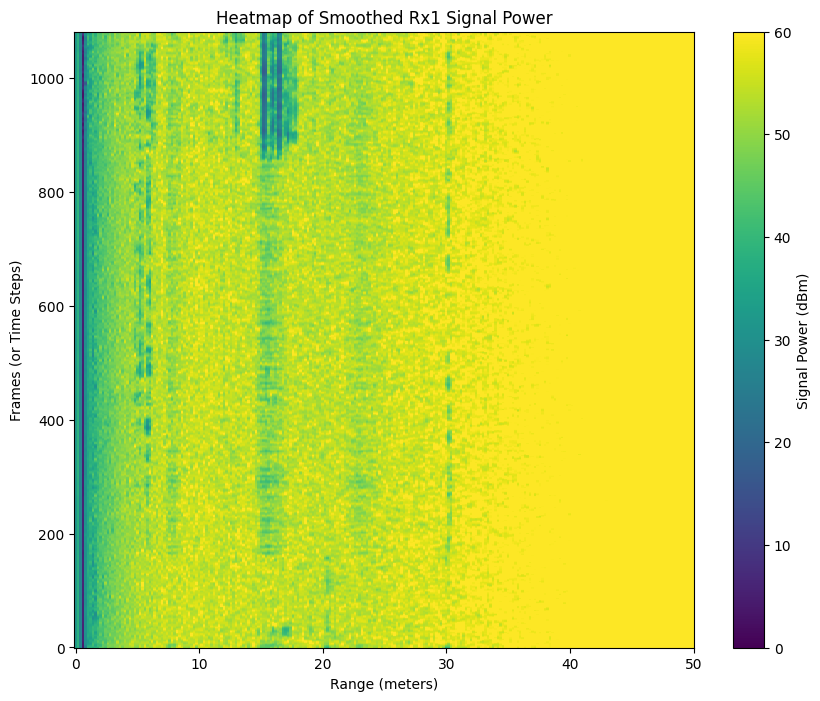

In [45]:
# Assuming fd_data is your data with shape (343, 512, 8), containing I1 and Q1 signals

# Plot Rx1 signal power with Gaussian smoothing
plot_rx1_signal_power(fd_data, range_bin_resolution=RANGE_BIN_RESOLUTION, max_range=50, sigma=2, title='Heatmap of Smoothed Rx1 Signal Power')


In [46]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_rx1_signal_power(fd_data):
    """
    Calculates the signal power of Rx1 from I1 and Q1 components.

    Parameters:
    fd_data (3D array): The data containing I1, Q1, I2, Q2 signals (range bins x signal components).

    Returns:
    np.ndarray: Signal power for Rx1.
    """
    I1 = fd_data[:, :, 0]  # I1 signal
    Q1 = fd_data[:, :, 1]  # Q1 signal
    
    # Calculate the signal power for Rx1
    signal_power = np.sqrt(I1**2 + Q1**2)
    return signal_power

def calculate_rx2_signal_power(fd_data):
    """
    Calculates the signal power of Rx2 from I2 and Q2 components.

    Parameters:
    fd_data (3D array): The data containing I1, I1_phase Q1, Q1_phase, I2, I2_phase, Q2, Q2_phase signals (range bins x signal components).

    Returns:
    np.ndarray: Signal power for Rx1.
    """
    I2 = fd_data[:, :, 2]  # I2 signal
    Q2 = fd_data[:, :, 3]  # Q2 signal
    
    # Calculate the signal power for Rx1
    signal_power = np.sqrt(I2**2 + Q2**2)
    return signal_power

def ca_cfar(signal_power, num_training=10, num_guard=5, threshold=10):
    """
    Applies CA-CFAR to the given signal power data.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    threshold (float): Threshold in dBm.

    Returns:
    np.ndarray: CA-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Convert threshold from dBm to linear scale
    threshold_linear = 10**(threshold / 10)
    
    # Loop through each range bin and time sample, applying CA-CFAR
    for t in range(num_samples):
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            # Calculate the noise level using training cells
            leading_noise = np.sum(signal_power[t, i - num_training - num_guard : i - num_guard])
            lagging_noise = np.sum(signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training])
            total_noise = (leading_noise + lagging_noise) / (2 * num_training)
            
            # Compare the signal power of the CUT (cell under test) to the threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result

def caso_cfar(signal_power, num_training=10, num_guard=5, threshold=10):
    """
    Applies CASO-CFAR (Cell Averaging Smallest Of CFAR) to the given signal power data.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    threshold (float): Threshold in dBm.

    Returns:
    np.ndarray: CASO-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Convert threshold from dBm to linear scale
    threshold_linear = 10**(threshold / 10)
    
    # Loop through each range bin and time sample, applying CASO-CFAR
    for t in range(num_samples):
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            # Calculate the noise level using leading and lagging training cells
            leading_noise = np.sum(signal_power[t, i - num_training - num_guard : i - num_guard])
            lagging_noise = np.sum(signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training])
            
            # Use the smallest noise estimate
            total_noise = min(leading_noise, lagging_noise) / num_training
            
            # Compare the signal power of the CUT (cell under test) to the threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result


def plot_cfar_heatmap(cfar_result, range_bin_resolution=0.2, num_range_bins=512, title='CA-CFAR Detection Heatmap'):
    """
    Plots a heatmap for the CA-CFAR detection result.

    Parameters:
    cfar_result (np.ndarray): CA-CFAR detection result as a binary matrix.
    range_bin_resolution (float): The resolution of range bins in meters.
    num_range_bins (int): Number of range bins.
    title (str): Title of the heatmap.
    """
    # Calculate the actual range bin distances (for the x-axis)
    range_bin_distances = np.arange(num_range_bins) * range_bin_resolution

    # Plot the CFAR detection result as a heatmap
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(range_bin_distances, np.arange(cfar_result.shape[0]), cfar_result, cmap='hot', shading='auto')

    # Add colorbar and labels
    plt.colorbar(label='Detection (1 = Detected)')
    plt.xlabel('Range (meters)')
    plt.ylabel('Time Samples')
    plt.title(title)

    # Show the plot
    plt.show()


In [47]:
def caso_cfar_time(signal_power, num_training=10, num_guard=5, threshold=10):
    """
    Applies CASO-CFAR (Cell Averaging Smallest Of CFAR) across time for each range bin.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    threshold (float): Threshold in dBm.

    Returns:
    np.ndarray: CASO-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Convert threshold from dBm to linear scale
    threshold_linear = 10**(threshold / 10)
    
    # Loop through each range bin and apply CASO-CFAR across time (vertically)
    for i in range(num_bins):
        for t in range(num_training + num_guard, num_samples - (num_training + num_guard)):
            # Calculate the noise level using leading and lagging training cells along the time axis
            leading_noise = np.sum(signal_power[t - num_training - num_guard : t - num_guard, i])
            lagging_noise = np.sum(signal_power[t + num_guard + 1 : t + num_guard + 1 + num_training, i])
            
            # Use the smallest noise estimate
            total_noise = min(leading_noise, lagging_noise) / num_training
            
            # Compare the signal power of the CUT (cell under test) to the threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result



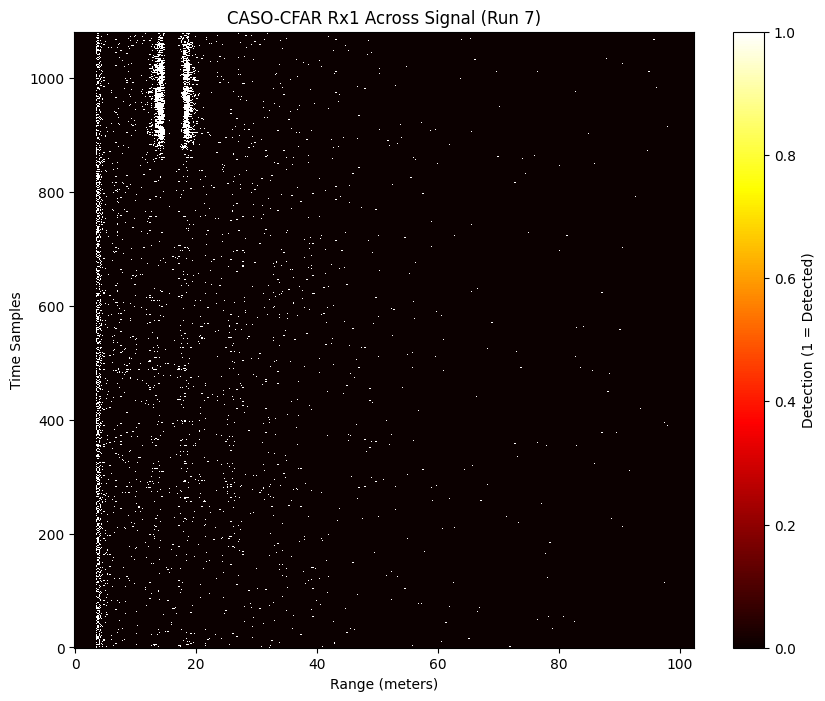

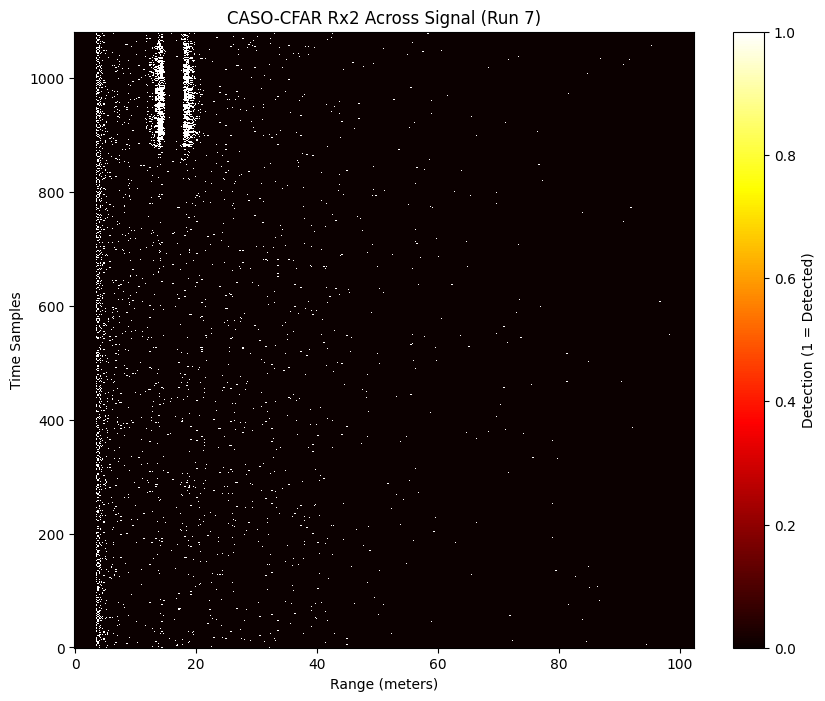

In [103]:
num_training = 15
num_guard = 3
threshold = 1.3

# Calculate the signal power for Rx1
signal_power_rx1= calculate_rx1_signal_power(fd_data)
signal_power_rx2= calculate_rx2_signal_power(fd_data)

# Apply CA-CFAR with a sliding window of 10, guard cells of 5, and threshold of 10 dBm
# cfar_result_rx1 = ca_cfar(signal_power_rx1, num_training=num_training, num_guard=num_guard, threshold=threshold)
cfar_result_rx1 = caso_cfar(signal_power_rx1, num_training=num_training, num_guard=num_guard, threshold=threshold)
cfar_result_rx2 = caso_cfar(signal_power_rx2, num_training=num_training, num_guard=num_guard, threshold=threshold)

# Plot the CA-CFAR detection result as a heatmap
plot_cfar_heatmap(cfar_result_rx1, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513,title=f'CASO-CFAR Rx1 Across Signal (Run {runNumber})')
plot_cfar_heatmap(cfar_result_rx2, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title=f'CASO-CFAR Rx2 Across Signal (Run {runNumber})')


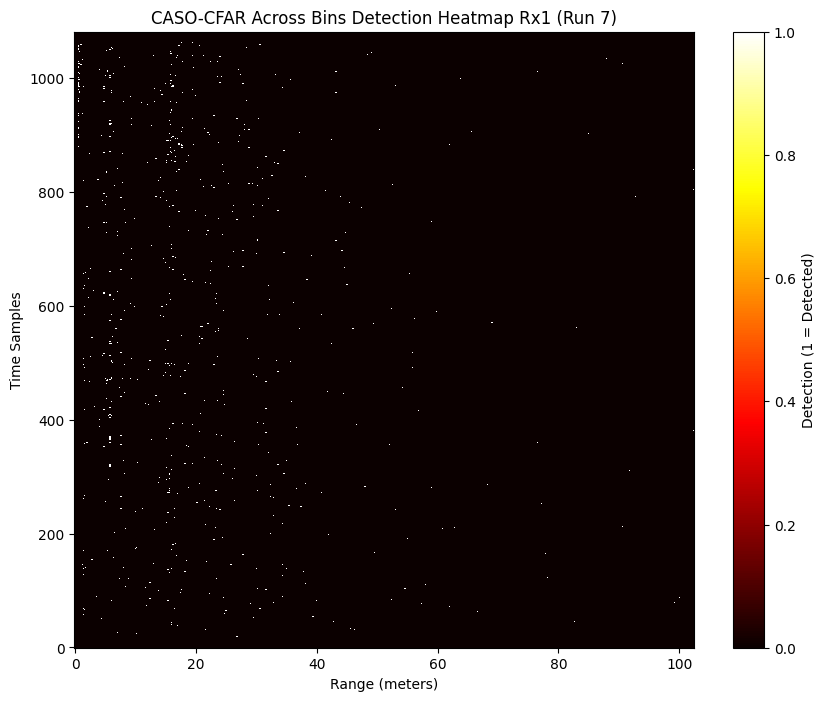

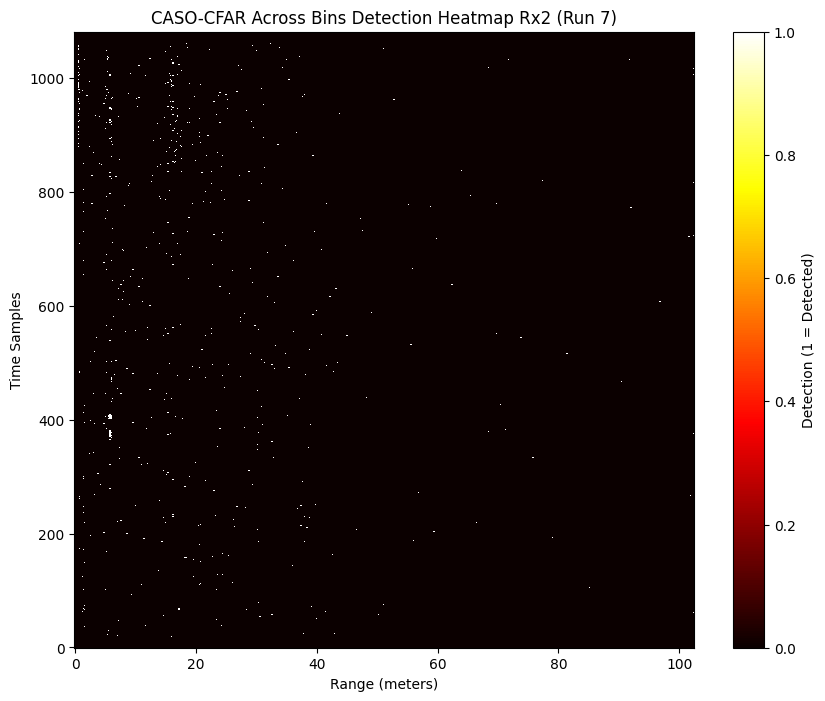

In [111]:
# Example usage for CASO-CFAR across time

num_training_time = 15
num_guard_time = 3
threshold_time = 1.5

# Calculate the signal power for Rx1
signal_power_rx1_time = calculate_rx1_signal_power(fd_data)
signal_power_rx2_time = calculate_rx2_signal_power(fd_data)

# Apply CASO-CFAR across time with a sliding window of 10, guard cells of 5, and threshold of 10 dBm
caso_cfar_time_result_rx1 = caso_cfar_time(signal_power_rx1_time, num_training=num_training_time, num_guard=num_guard_time, threshold=threshold_time)
caso_cfar_time_result_rx2 = caso_cfar_time(signal_power_rx2_time, num_training=num_training_time, num_guard=num_guard_time, threshold=threshold_time)

# Plot the CASO-CFAR detection result as a heatmap
plot_cfar_heatmap(caso_cfar_time_result_rx1, range_bin_resolution=0.2, num_range_bins=513, title=f'CASO-CFAR Across Bins Detection Heatmap Rx1 (Run {runNumber})')
plot_cfar_heatmap(caso_cfar_time_result_rx2, range_bin_resolution=0.2, num_range_bins=513, title=f'CASO-CFAR Across Bins Detection Heatmap Rx2 (Run {runNumber})')

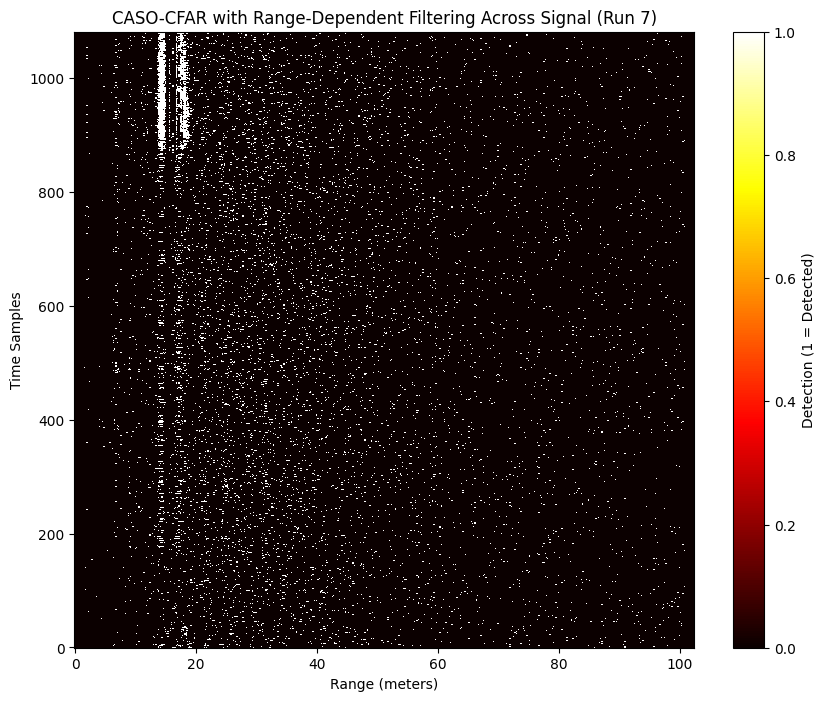

In [50]:
from scipy.ndimage import gaussian_filter

def caso_cfar_with_time_range_filtering(signal_power, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5):
    """
    Applies CASO-CFAR (Cell Averaging Smallest Of CFAR) across time for each range bin, with range-dependent filtering
    across all bins for each time range.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.

    Returns:
    np.ndarray: CASO-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Loop through each time sample and apply CASO-CFAR across the range bins
    for t in range(num_samples):
        # Loop through range bins, applying the range-dependent threshold
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            # Apply range-dependent scaling: increase the threshold for lower range bins
            range_scaled_threshold = base_threshold + range_factor / (i + 1)
            threshold_linear = 10**(range_scaled_threshold / 10)
            
            # Calculate the noise level using leading and lagging training cells for the current range bin
            leading_noise = np.sum(signal_power[t, i - num_training - num_guard : i - num_guard])
            lagging_noise = np.sum(signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training])
            
            # Use the smallest noise estimate
            total_noise = min(leading_noise, lagging_noise) / num_training
            
            # Compare the signal power of the CUT (cell under test) to the range-scaled threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result

def apply_gaussian_smoothing(signal_power, sigma=1):
    """
    Applies Gaussian smoothing to the signal power data.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    sigma (float): Standard deviation for Gaussian kernel.

    Returns:
    np.ndarray: Smoothed signal power.
    """
    smoothed_signal = gaussian_filter(signal_power, sigma=sigma)
    return smoothed_signal

def caso_cfar_with_limited_range_scaling(signal_power, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5, x_bins=50):
    """
    Applies CASO-CFAR (Cell Averaging Smallest Of CFAR) across time for each range bin, with range-dependent threshold
    scaling only for the first 'x' range bins.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.
    x_bins (int): Number of range bins to apply the increased threshold.

    Returns:
    np.ndarray: CASO-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Loop through each time sample and apply CASO-CFAR across the range bins
    for t in range(num_samples):
        # Loop through range bins, applying the range-dependent threshold
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            if i < x_bins:
                # Apply range-dependent scaling for the first 'x' bins
                range_scaled_threshold = base_threshold + range_factor / (i + 1)
                threshold_linear = 10**(range_scaled_threshold / 10)
            else:
                # Use base threshold for bins after 'x' range bins
                threshold_linear = 10**(base_threshold / 10)
            # print(threshold_linear)
            
            # Calculate the noise level using leading and lagging training cells for the current range bin
            leading_noise = np.sum(signal_power[t, i - num_training - num_guard : i - num_guard])
            lagging_noise = np.sum(signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training])
            
            # Use the smallest noise estimate
            total_noise = min(leading_noise, lagging_noise) / num_training
            
            # Compare the signal power of the CUT (cell under test) to the threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result

def caso_cfar_with_percentage_threshold(signal_power, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5, x_bins=50, percentage_threshold=1.2):
    """
    Applies CASO-CFAR (Cell Averaging Smallest Of CFAR) across time for each range bin, with range-dependent threshold
    scaling only for the first 'x' range bins and a percentage-based threshold.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.
    x_bins (int): Number of range bins to apply the increased threshold.
    percentage_threshold (float): The factor by which the signal power must exceed the noise mean (e.g., 1.2 for 20% higher).

    Returns:
    np.ndarray: CASO-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Loop through each time sample and apply CASO-CFAR across the range bins
    for t in range(num_samples):
        # Loop through range bins, applying the range-dependent threshold
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            if i < x_bins:
                # Apply range-dependent scaling for the first 'x' bins
                range_scaled_threshold = base_threshold + range_factor / (i + 1)
                threshold_linear = 10**(range_scaled_threshold / 10)
            else:
                # Use base threshold for bins after 'x' range bins
                threshold_linear = 10**(base_threshold / 10)
            
            # Calculate the noise level using leading and lagging training cells for the current range bin
            leading_noise = np.sum(signal_power[t, i - num_training - num_guard : i - num_guard])
            lagging_noise = np.sum(signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training])
            
            # Use the smallest noise estimate
            total_noise = min(leading_noise, lagging_noise) / num_training
            
            # Apply the percentage threshold for detection
            adjusted_threshold = total_noise * percentage_threshold * threshold_linear
            
            # Compare the signal power of the CUT (cell under test) to the adjusted threshold
            if signal_power[t, i] > adjusted_threshold:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result


def os_cfar_time(signal_power, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5, k_order=None):
    """
    Applies OS-CFAR (Ordered Statistics CFAR) across time for each range bin, with range-dependent filtering.

    Parameters:
    signal_power (2D array): The signal power data (time x range bins).
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.
    k_order (int): The index for ordered statistics. Defaults to median.

    Returns:
    np.ndarray: OS-CFAR detection result as a binary matrix.
    """
    num_bins = signal_power.shape[1]  # Number of range bins
    num_samples = signal_power.shape[0]  # Number of time samples
    if k_order is None:
        k_order = num_training  # Use the median as the default
    
    # Initialize a matrix to hold the CFAR detection result
    cfar_result = np.zeros(signal_power.shape)
    
    # Loop through each time sample and apply OS-CFAR across the range bins
    for t in range(num_samples):
        # Loop through range bins, applying the range-dependent threshold
        for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
            # Apply range-dependent scaling: increase the threshold for lower range bins
            range_scaled_threshold = base_threshold + range_factor / (i + 1)
            threshold_linear = 10**(range_scaled_threshold / 10)
            
            # Collect leading and lagging noise values
            leading_noise = signal_power[t, i - num_training - num_guard : i - num_guard]
            lagging_noise = signal_power[t, i + num_guard + 1 : i + num_guard + 1 + num_training]
            
            # Concatenate the noise samples
            total_noise_samples = np.concatenate([leading_noise, lagging_noise])
            
            # Sort the noise samples and take the k-th ordered statistic
            total_noise_sorted = np.sort(total_noise_samples)
            total_noise = total_noise_sorted[k_order - 1]
            
            # Compare the signal power of the CUT (cell under test) to the range-scaled threshold
            if signal_power[t, i] > total_noise * threshold_linear:
                cfar_result[t, i] = 1  # Detection
    
    return cfar_result



# Step 1: Calculate Rx2 signal power
rx2_signal_power = calculate_rx1_signal_power(fd_data)

# Step 2: Apply CASO-CFAR with range-dependent thresholding across time and range bins

caso_cfar_time_result = caso_cfar_with_time_range_filtering(rx2_signal_power, num_training=5, num_guard=3, base_threshold=0.8, range_factor=25)
# caso_cfar_time_result = os_cfar_time(rx2_signal_power, num_training=5, num_guard=3, base_threshold=1, range_factor=1)

# Step 3: Plot the CASO-CFAR detection result as a heatmap
plot_cfar_heatmap(caso_cfar_time_result, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title=f'CASO-CFAR with Range-Dependent Filtering Across Signal (Run {runNumber})')


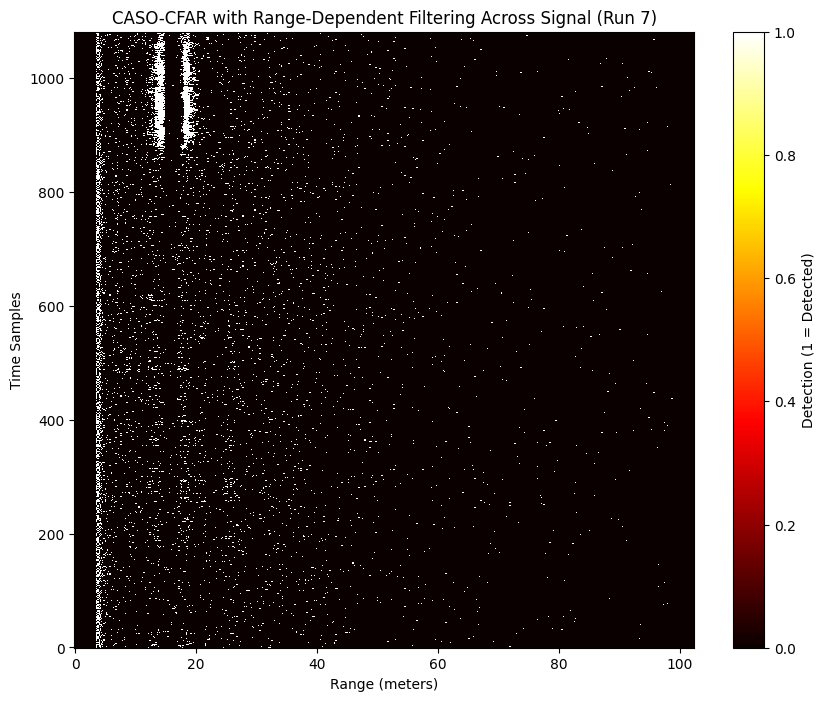

In [51]:
# Example usage with a 20% higher threshold
result_percentage_cfar = caso_cfar_with_percentage_threshold(rx2_signal_power, num_training=15, num_guard=3, base_threshold=0.3, range_factor=1.5, x_bins=50, percentage_threshold=1.2)
plot_cfar_heatmap(result_percentage_cfar, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title=f'CASO-CFAR with Range-Dependent Filtering Across Signal (Run {runNumber})')

(1082, 513)


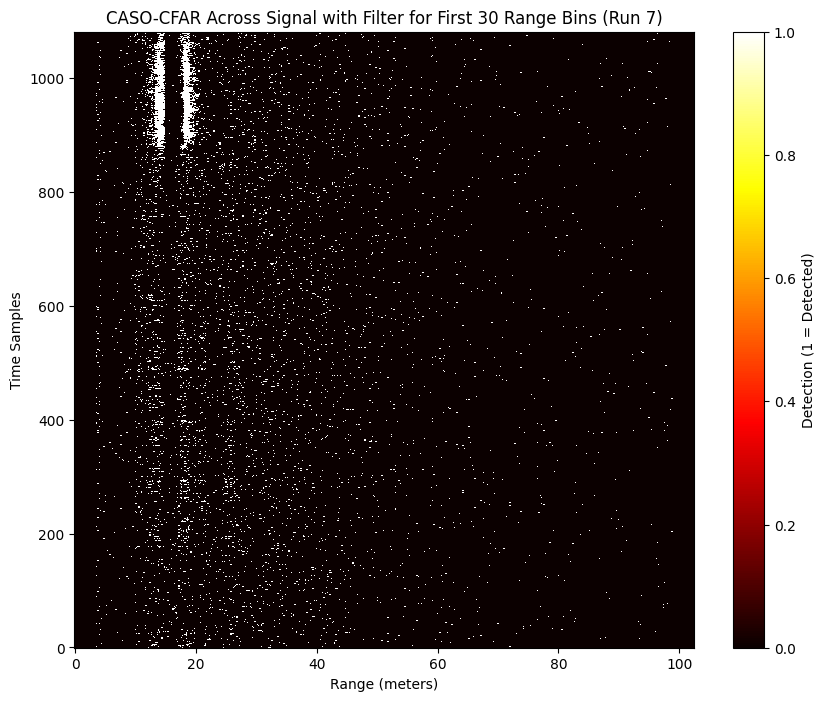

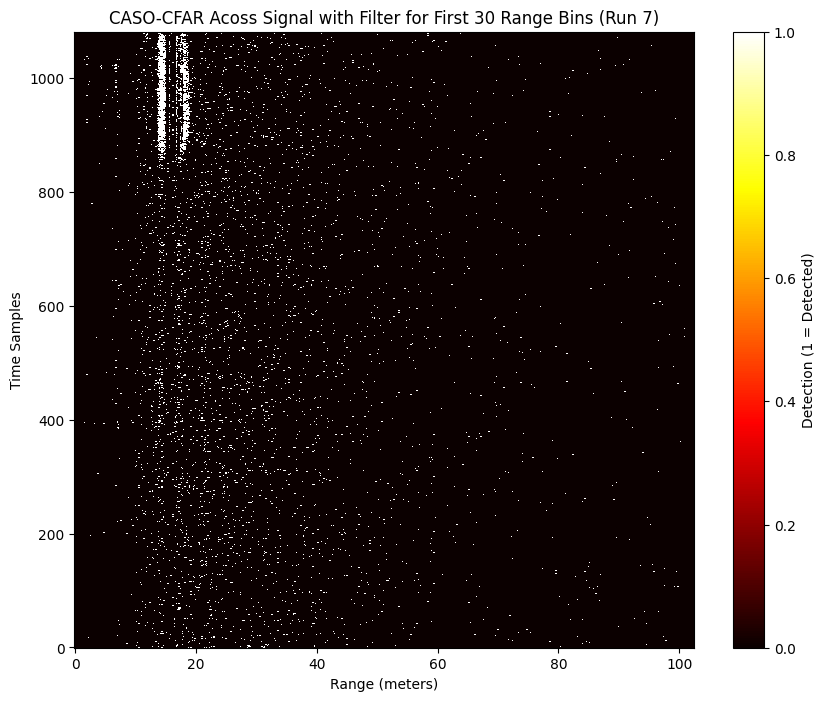

In [52]:
# Step 1: Calculate Rx2 signal power
rx2_signal_power = calculate_rx2_signal_power(fd_data)
rx1_signal_power = calculate_rx1_signal_power(fd_data)

# Step 2: Apply Gaussian smoothing to the signal power (optional)
smoothed_signal_power_rx2 = apply_gaussian_smoothing(rx2_signal_power, sigma=0.3)
smoothed_signal_power_rx1 = apply_gaussian_smoothing(rx1_signal_power, sigma=0.3)

# Step 3: Apply CASO-CFAR with range-dependent scaling for the first 'x' bins
x_bins = 50 # Only increase the threshold for the first 50 range bins
# caso_cfar_time_result = caso_cfar_with_limited_range_scaling(smoothed_signal_power, num_training=5, num_guard=3, base_threshold=0.9, range_factor=20, x_bins=x_bins) # GGOOOODOODODODODOODO DAAAATTTATATATTATATA
caso_cfar_time_result_rx1 = caso_cfar_with_limited_range_scaling(smoothed_signal_power_rx1, num_training=15, num_guard=3, base_threshold=1.0, range_factor=20, x_bins=x_bins)
caso_cfar_time_result_rx2 = caso_cfar_with_limited_range_scaling(smoothed_signal_power_rx2, num_training=5, num_guard=3, base_threshold=1.1, range_factor=20, x_bins=x_bins)
print(caso_cfar_time_result_rx1.shape)

# Step 4: Plot the CASO-CFAR detection result as a heatmap
plot_cfar_heatmap(caso_cfar_time_result_rx1, range_bin_resolution=0.2, num_range_bins=513, title=f'CASO-CFAR Across Signal with Filter for First 30 Range Bins (Run {runNumber})')
plot_cfar_heatmap(caso_cfar_time_result_rx2, range_bin_resolution=0.2, num_range_bins=513, title=f'CASO-CFAR Acoss Signal with Filter for First 30 Range Bins (Run {runNumber})')

# Velocity time 

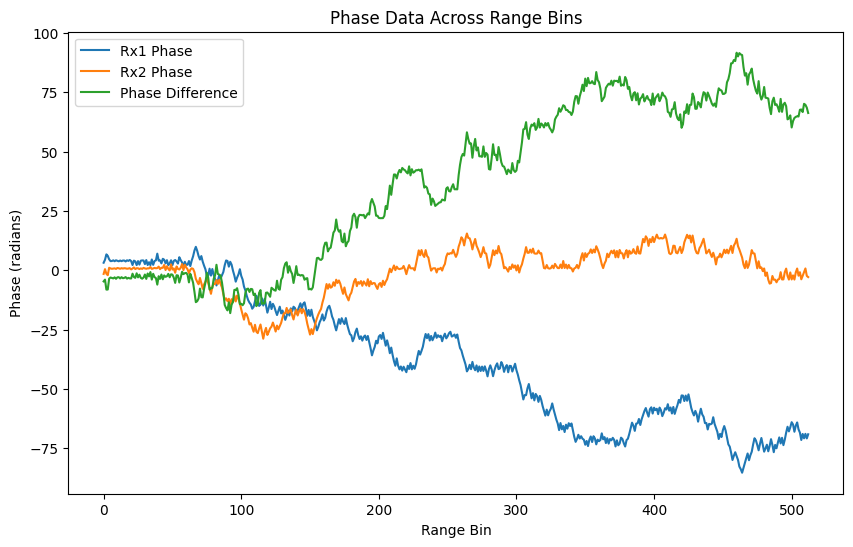

(1081, 513)
(1081, 513)


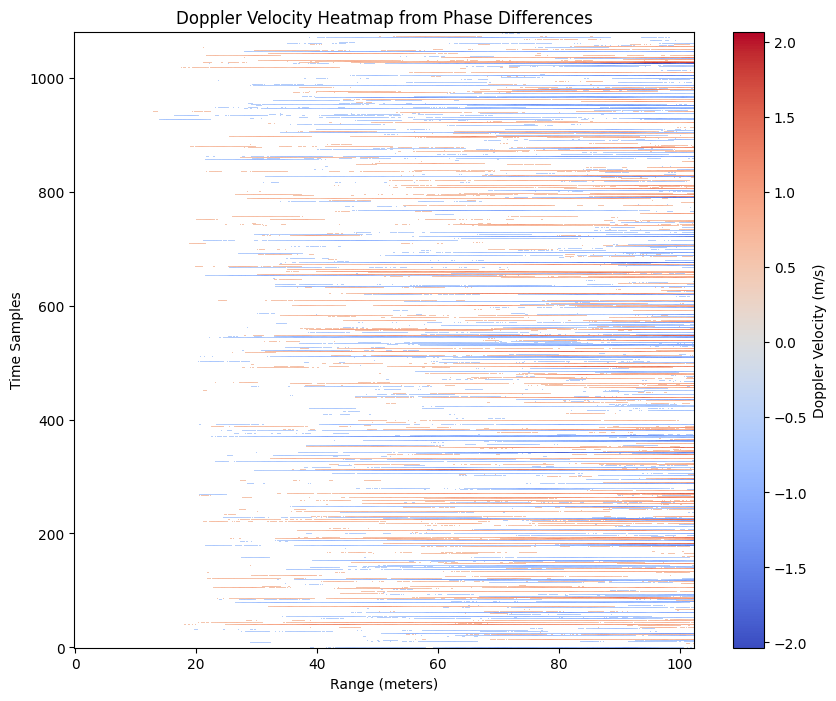

In [53]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def calculate_doppler_velocity_from_phases(fd_data, wavelength, sampling_interval):
    """
    Calculates the Doppler velocity based on phase differences between Rx1 and Rx2 over time.

    Parameters:
    fd_data (3D array): The data containing I1, I1_phase, Q1, Q1_phase, I2, I2_phase, Q2, Q2_phase signals 
                        (time samples x range bins x signal components).
    wavelength (float): The radar signal wavelength.
    sampling_interval (float): The time interval between samples (in seconds).

    Returns:
    np.ndarray: Doppler velocity for each range bin (time samples x range bins).
    """
    # Extract Rx1 and Rx2 phases
    rx1_phase = fd_data[:, :, 4]  # Rx1 phase signal
    rx2_phase = fd_data[:, :, 5]  # Rx2 phase signal

    # Convert phases from degrees to radians
    rx1_phase = np.radians(rx1_phase)
    rx2_phase = np.radians(rx2_phase)


    # Compute the phase difference between Rx1 and Rx2 at each time step
    phase_diff = rx2_phase - rx1_phase
    
    # Plot raw phases
    plt.figure(figsize=(10, 6))
    plt.plot(rx1_phase[0, :], label="Rx1 Phase")
    plt.plot(rx2_phase[0, :], label="Rx2 Phase")
    plt.plot(phase_diff[0, :], label="Phase Difference")
    plt.legend()
    plt.title("Phase Data Across Range Bins")
    plt.xlabel("Range Bin")
    plt.ylabel("Phase (radians)")
    plt.show()
    
    # Calculate the phase difference change over time (differentiate over time)
    phase_diff_over_time = np.diff(phase_diff, axis=0)
    
    # Doppler velocity formula: v = (Δφ * λ) / (2π * T)
    doppler_velocity = (phase_diff_over_time * wavelength) / (2 * np.pi * sampling_interval)
    
    print(doppler_velocity.shape)

    return doppler_velocity


# def calculate_doppler_velocity_from_phases(fd_data, wavelength, sampling_interval):
#     """
#     Calculates the Doppler velocity based on phase differences between Rx1 and Rx2 over time.

#     Parameters:
#     fd_data (3D array): The data containing I1, I1_phase, Q1, Q1_phase, I2, I2_phase, Q2, Q2_phase signals 
#                         (time samples x range bins x signal components).
#     wavelength (float): The radar signal wavelength.
#     sampling_interval (float): The time interval between samples (in seconds).

#     Returns:
#     np.ndarray: Doppler velocity for each range bin (time samples x range bins).
#     """
#     # Extract Rx1 and Rx2 phases
#     rx1_phase = fd_data[:, :, 4]  # Rx1 phase signal
#     rx2_phase = fd_data[:, :, 5]  # Rx2 phase signal
    
#     # Convert phases from degrees to radians
#     rx1_phase = np.unwrap(np.radians(rx1_phase))
#     rx2_phase = np.unwrap(np.radians(rx2_phase))

#     # Calculate phase differences over time (along the time axis)
#     rx1_phase_diff = np.diff(rx1_phase, axis=0)
#     rx2_phase_diff = np.diff(rx2_phase, axis=0)

#     # Calculate average phase difference (can be Rx1 + Rx2 / 2, or take Rx1 alone)
#     phase_diff_avg = (rx1_phase_diff + rx2_phase_diff) / 2

#     # Doppler velocity formula: v = (Δφ * λ) / (4π * T)
#     doppler_velocity = (phase_diff_avg * wavelength) / (4 * np.pi * sampling_interval)

#     return doppler_velocity

def plot_doppler_velocity_heatmap(doppler_velocity, range_bin_resolution=0.2, num_range_bins=512, title='Doppler Velocity Heatmap', threshold=0.1):
    """
    Plots a heatmap of the Doppler velocity for each range bin, showing only values above and below a threshold.

    Parameters:
    doppler_velocity (np.ndarray): Doppler velocity array (time samples x range bins).
    range_bin_resolution (float): The resolution of range bins in meters.
    num_range_bins (int): Number of range bins.
    title (str): Title of the heatmap.
    threshold (float): Threshold for displaying velocity values. Values between -threshold and +threshold are masked.
    """
    # Mask the Doppler velocity values that are between -threshold and +threshold
    masked_doppler_velocity = np.copy(doppler_velocity)
    masked_doppler_velocity[(masked_doppler_velocity > -threshold) & (masked_doppler_velocity < threshold)] = np.nan

    # Calculate the actual range bin distances (for the x-axis)
    range_bin_distances = np.arange(num_range_bins) * range_bin_resolution

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(range_bin_distances, np.arange(masked_doppler_velocity.shape[0]), masked_doppler_velocity, cmap='coolwarm', shading='auto')
    
    # Add colorbar and labels
    plt.colorbar(label='Doppler Velocity (m/s)')
    plt.xlabel('Range (meters)')
    plt.ylabel('Time Samples')
    plt.title(title)

    # Show the plot
    plt.show()


# Example usage
wavelength = 0.01233714  # Wavelength for 24.3 GHz signal in meters
sampling_interval = 0.241  # Time interval between samples in seconds

# Step 1: Calculate Doppler velocity from phase differences
doppler_velocity = calculate_doppler_velocity_from_phases(fd_data, wavelength=wavelength, sampling_interval=sampling_interval)
print(doppler_velocity.shape)

# Step 2: Plot the Doppler velocity as a heatmap
plot_doppler_velocity_heatmap(doppler_velocity, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title='Doppler Velocity Heatmap from Phase Differences', threshold=0.5)


# Micro-Doppler Signatures


In [54]:
import numpy as np
import matplotlib.pyplot as plt

def plot_doppler_signal_power(doppler_velocity, signal_power, sampling_interval=0.241):
    """
    Plots the Doppler velocity against signal power over time, handling varying velocity values per time sample.

    Parameters:
    doppler_velocity (np.ndarray): 2D array containing Doppler velocity values (shape: [time_samples, range_bins]).
    signal_power (np.ndarray): 2D array containing signal power values (shape: [time_samples, range_bins]).
    sampling_interval (float): The time interval between samples in seconds (default: 0.241).

    Returns:
    None: Displays the plot.
    """
    # Define the time axis
    time_axis = np.arange(doppler_velocity.shape[0]) * sampling_interval

    # We no longer assume velocity is consistent, so we use the entire 2D velocity array
    velocity_axis = doppler_velocity

    # Create a meshgrid for time and velocity
    T, V = np.meshgrid(time_axis, np.arange(doppler_velocity.shape[1]))

    # Plot the signal power using pcolormesh
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(T, velocity_axis.T, signal_power.T, shading='auto', cmap='jet')

    # Add labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.title('Doppler Velocity vs Signal Power Over Time')

    # Add color bar to show the signal power intensity
    cbar = plt.colorbar()
    cbar.set_label('Signal Strength (dBm)')

    # Show the plot
    plt.show()

def plot_doppler_signal_power_with_frequency(doppler_velocity, signal_power, wavelength, sampling_interval=0.241):
    """
    Plots the Doppler frequency (calculated from velocity) against signal power over time.

    Parameters:
    doppler_velocity (np.ndarray): 2D array containing Doppler velocity values (shape: [time_samples, range_bins]).
    signal_power (np.ndarray): 2D array containing signal power values (shape: [time_samples, range_bins]).
    wavelength (float): The radar signal wavelength (in meters).
    sampling_interval (float): The time interval between samples in seconds (default: 0.241).

    Returns:
    None: Displays the plot.
    """
    # Define the time axis
    time_axis = np.arange(doppler_velocity.shape[0]) * sampling_interval

    # Convert Doppler velocity to Doppler frequency: f_d = (2 * v) / wavelength
    doppler_frequency = (2 * doppler_velocity) / wavelength

    # Create a meshgrid for time and frequency
    T, F = np.meshgrid(time_axis, np.arange(doppler_velocity.shape[1]))

    # Plot the signal power using pcolormesh
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(T, doppler_frequency.T, signal_power.T, shading='auto', cmap='jet')

    # Add labels and title
    plt.xlabel('Time (s)')
    plt.ylabel('Doppler Frequency (Hz)')
    plt.title('Doppler Frequency vs Signal Power Over Time')

    # Add color bar to show the signal power intensity
    cbar = plt.colorbar()
    cbar.set_label('Signal Strength (dBm)')

    # Show the plot
    plt.show()



/tmp/ipykernel_2283/4167317863.py:27: UserWarning:

The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.



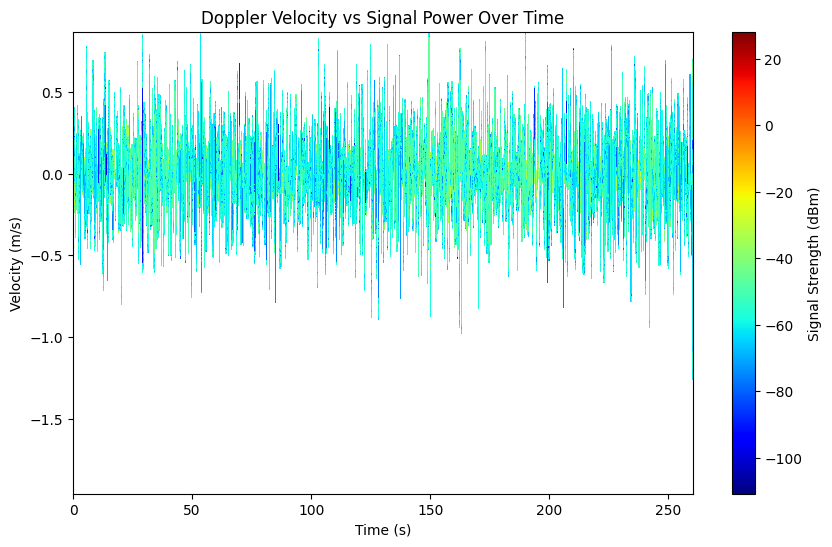

/tmp/ipykernel_2283/4167317863.py:65: UserWarning:

The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.



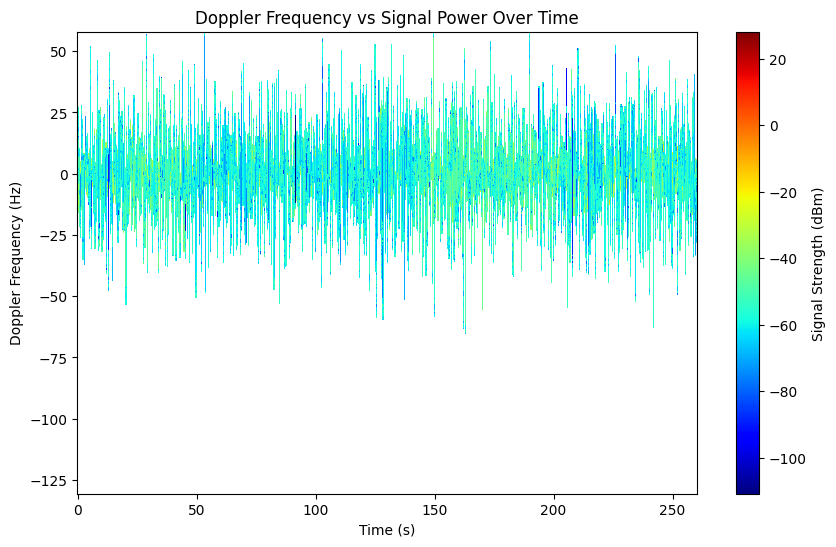

In [55]:
test_power_rx1 =  rx2_signal_power[1:,:]
test_power_rx1 = fd_data[1:, :, 0] 
plot_doppler_signal_power(doppler_velocity, test_power_rx1, sampling_interval=0.241)

plot_doppler_signal_power_with_frequency(doppler_velocity, test_power_rx1, wavelength=0.03, sampling_interval=0.241)

# Combination of Velocity and CFAR

(1081, 513)


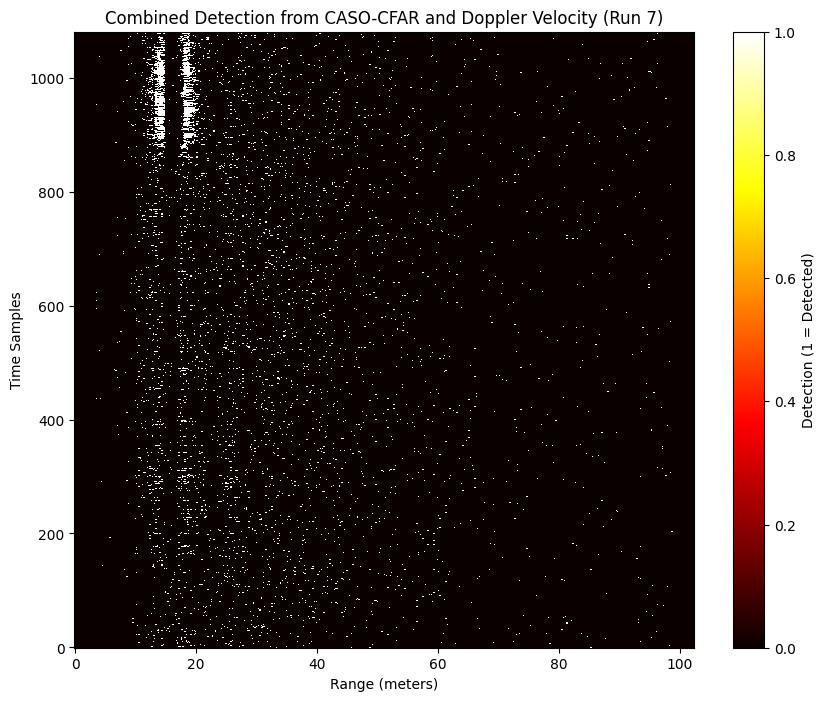

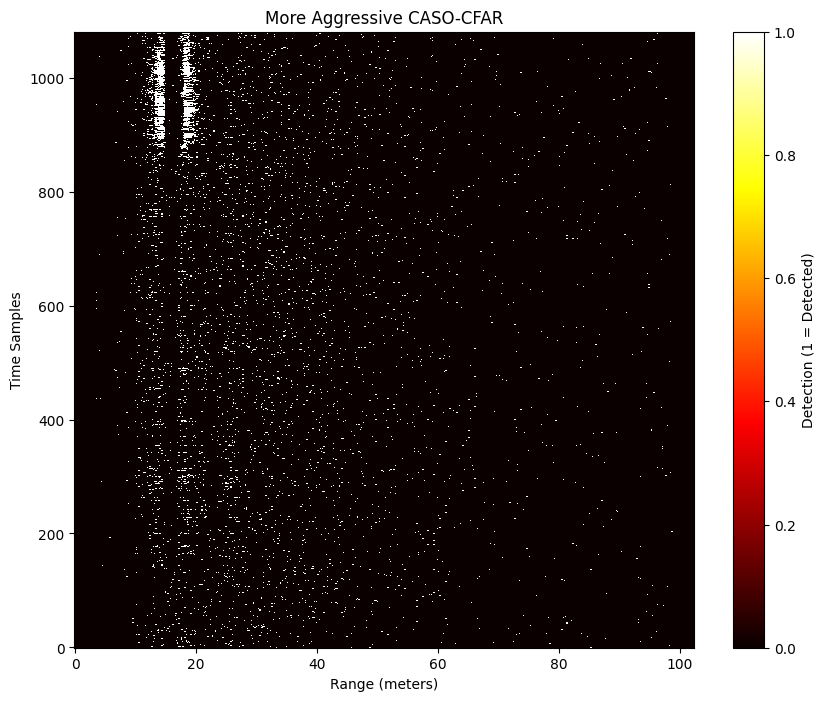

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def combine_cfar_and_doppler(caso_cfar_time_result, doppler_velocity, velocity_threshold):
    """
    Combines CASO-CFAR results and Doppler velocity values to make detections based on both criteria.

    Parameters:
    caso_cfar_time_result (np.ndarray): CASO-CFAR detection result (time x range bins).
    doppler_velocity (np.ndarray): Doppler velocity array (time x range bins).
    velocity_threshold (float): Doppler velocity threshold. Detections occur if |doppler_velocity| > velocity_threshold.

    Returns:
    np.ndarray: Combined detection result as a binary matrix.
    """
    # Create a mask where Doppler velocity exceeds the threshold
    doppler_mask = (doppler_velocity > velocity_threshold) | (doppler_velocity < -velocity_threshold)

    # Combine the doppler mask with the CASO-CFAR result (logical AND)
    combined_detection = doppler_mask & (caso_cfar_time_result == 1)

    return combined_detection

def plot_combined_detection_heatmap(combined_detection, range_bin_resolution=0.2, num_range_bins=513, title='Combined Detection Heatmap'):
    """
    Plots a heatmap for the combined detection result from CASO-CFAR and Doppler velocity.

    Parameters:
    combined_detection (np.ndarray): Combined detection result as a binary matrix.
    range_bin_resolution (float): The resolution of range bins in meters.
    num_range_bins (int): Number of range bins.
    title (str): Title of the heatmap.
    """
    # Calculate the actual range bin distances (for the x-axis)
    range_bin_distances = np.arange(num_range_bins) * range_bin_resolution

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    plt.pcolormesh(range_bin_distances, np.arange(combined_detection.shape[0]), combined_detection, cmap='hot', shading='auto')

    # Add colorbar and labels
    plt.colorbar(label='Detection (1 = Detected)')
    plt.xlabel('Range (meters)')
    plt.ylabel('Time Samples')
    plt.title(title)

    # Show the plot
    plt.show()

# Example usage
velocity_threshold = 0.05  # Set Doppler velocity threshold

# Step 1: Combine CASO-CFAR result with Doppler velocity based on threshold
result_trimmed = caso_cfar_time_result_rx1[1:,:]
print(result_trimmed.shape)
combined_detection = combine_cfar_and_doppler(result_trimmed, doppler_velocity, velocity_threshold)

# Step 2: Plot the combined detection result as a heatmap
plot_combined_detection_heatmap(combined_detection, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title=f'Combined Detection from CASO-CFAR and Doppler Velocity (Run {runNumber})')
plot_combined_detection_heatmap(combined_detection, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title='More Aggressive CASO-CFAR')


# Across Time

(1081, 513)


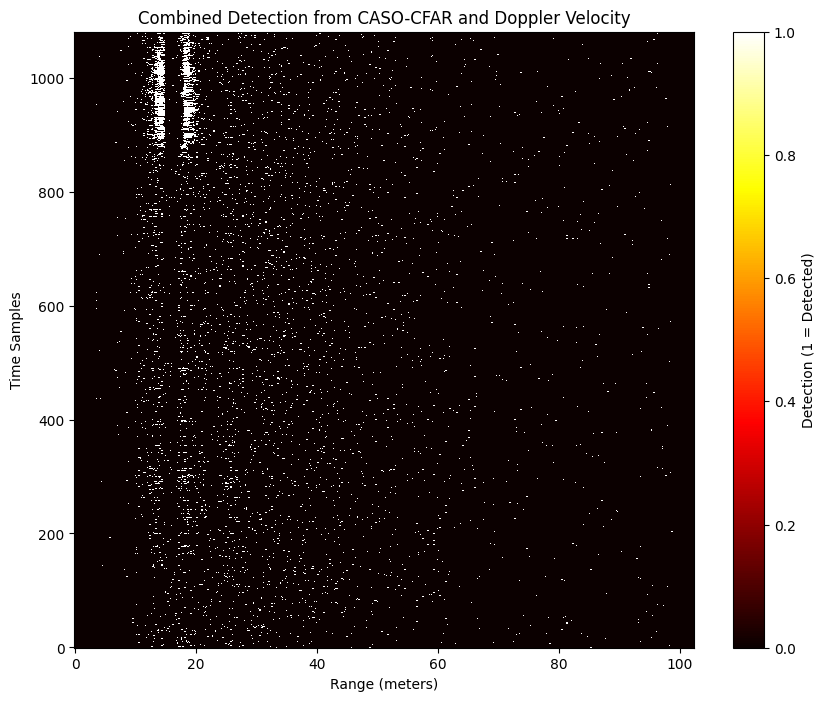

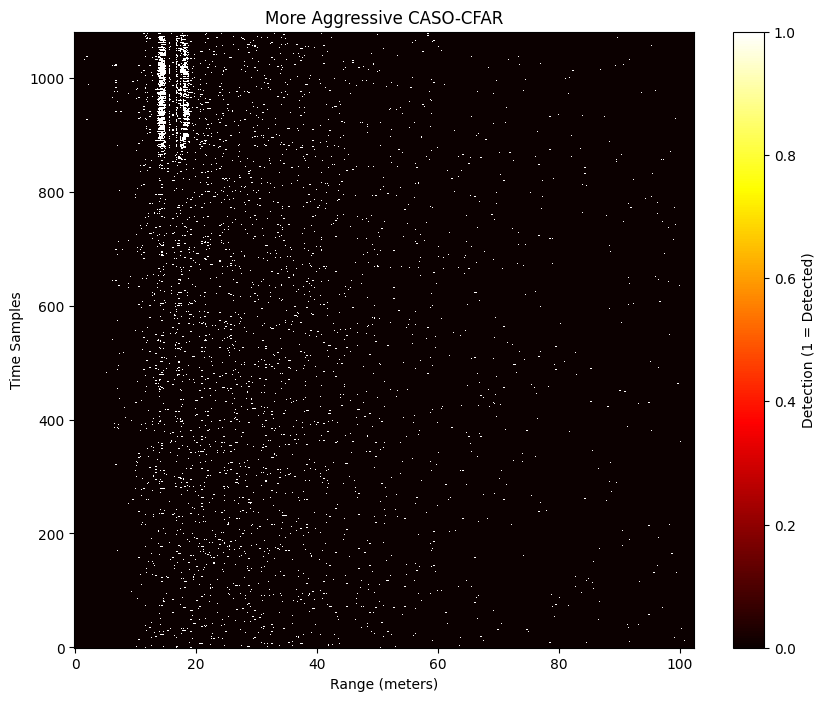

In [57]:
# Example usage
velocity_threshold = 0.05  # Set Doppler velocity threshold

# Step 1: Combine CASO-CFAR result with Doppler velocity based on threshold
result_trimmed_rx1 = caso_cfar_time_result_rx1[1:,:]
result_trimmed_rx2 = caso_cfar_time_result_rx2[1:,:]

print(result_trimmed_rx1.shape)
combined_detection_rx1 = combine_cfar_and_doppler(result_trimmed_rx1, doppler_velocity, velocity_threshold)
combined_detection_rx2 = combine_cfar_and_doppler(result_trimmed_rx2, doppler_velocity, velocity_threshold)

# Step 2: Plot the combined detection result as a heatmap
plot_combined_detection_heatmap(combined_detection_rx1, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title='Combined Detection from CASO-CFAR and Doppler Velocity')
plot_combined_detection_heatmap(combined_detection_rx2, range_bin_resolution=RANGE_BIN_RESOLUTION, num_range_bins=513, title='More Aggressive CASO-CFAR')

# CFAR Across a Timestamp
At one point in time, over all range bins

1.5681392145631248
59.38179745617633
1.5527842277894284
60.41716778632582
1.5386606852343632
60.6981272599618
1.525626683025227
62.139264865920296
1.5135612484362082
64.49878422765292
1.5023606277481616
65.62658374014242
1.4919353353255647
66.11339902361698
1.4822077881652367
66.65215818425331
1.4731103949845141
67.22654095969628
1.4645840012906084
67.89491648549354
1.456576615524458
68.61250324857792
1.4490423588334767
68.49174005720732
1.4419405940454082
68.95054658700512
1.435235199210281
69.54018633785107
1.428893958511103
70.09624454900589
1.4228880490316276
70.55508028602635
1.417191606254852
70.90845496548917
1.4117813545716207
70.90745713384091
1.4066362917418356
71.1674127526461
1.40173741834677
71.44999486160914
1.3970675049308237
71.58852457167146
1.392610890853203
71.55303788348625
1.3883533099290455
71.60221336447536
1.3842817387923017
71.54645535443242
1.3803842646028848
71.52684734526693
1.202264434617413
62.81659357260502
1.202264434617413
63.326093986638604
1.202264434

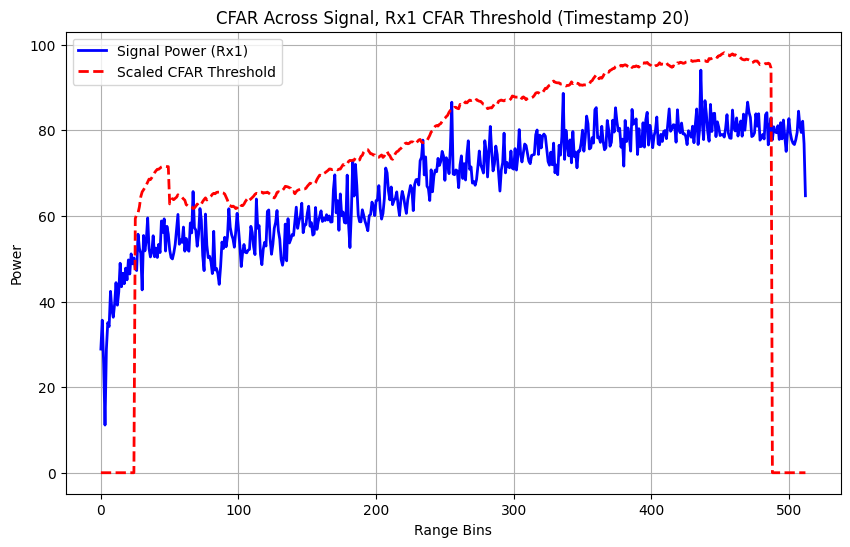

In [58]:
def plot_signal_power_vs_scaled_threshold_for_timestamp(signal_power, timestamp_index, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5, x_bins=50):
    """
    Plots signal power and range-scaled CFAR threshold across range bins for a singular timestamp.

    Parameters:
    signal_power (np.ndarray): The signal power data (time x range bins).
    timestamp_index (int): The index of the timestamp to plot.
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.
    x_bins (int): Number of range bins to apply the increased threshold.
    """
    # Extract signal power for the specific timestamp (across all range bins)
    signal_power_time = signal_power[timestamp_index, :]
    
    # Initialize an array to store the calculated threshold for each range bin
    calculated_threshold = np.zeros(signal_power_time.shape)
    
    # Calculate the threshold for each range bin
    num_bins = len(signal_power_time)
    for i in range(num_training + num_guard, num_bins - (num_training + num_guard)):
        if i < x_bins:
            # Apply range-dependent scaling for the first 'x_bins' bins
            range_scaled_threshold = base_threshold + range_factor / (i + 1)
            threshold_linear = 10**(range_scaled_threshold / 10)
        else:
            # Use base threshold for bins after 'x_bins'
            threshold_linear = 10**(base_threshold / 10)
        print(threshold_linear)
        
        # Calculate the noise level using leading and lagging training cells
        leading_noise = np.sum(signal_power_time[i - num_training - num_guard : i - num_guard])
        lagging_noise = np.sum(signal_power_time[i + num_guard + 1 : i + num_guard + 1 + num_training])
        
        # Use the smallest noise estimate
        total_noise = min(leading_noise, lagging_noise) / num_training
        
        # Store the calculated threshold
        calculated_threshold[i] = total_noise * threshold_linear
        print(calculated_threshold[i])
    
    # Plot Signal Power vs. Scaled Threshold for the selected timestamp
    plt.figure(figsize=(10, 6))
    plt.plot(signal_power_time, label='Signal Power (Rx1)', color='blue', lw=2)
    plt.plot(calculated_threshold, label='Scaled CFAR Threshold', color='red', lw=2, linestyle='--')
    
    plt.title(f'CFAR Across Signal, Rx1 CFAR Threshold (Timestamp {timestamp_index})')
    plt.xlabel('Range Bins')
    plt.ylabel('Power')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
timestamp_index = 20  # The timestamp you want to analyze

# Assuming I1_data is (224, 512) for time samples and range bins
I1_data = fd_data[:, :, 0]  # Extract I1 signal from fd_data

rx2_signal_power = calculate_rx2_signal_power(fd_data)
smoothed_signal_power = apply_gaussian_smoothing(rx2_signal_power, sigma=0.5)

# Plot signal power vs range-scaled threshold for a single timestamp across range bins
plot_signal_power_vs_scaled_threshold_for_timestamp(smoothed_signal_power, timestamp_index, num_training=20, num_guard=5, base_threshold=0.8, range_factor=30, x_bins=50)



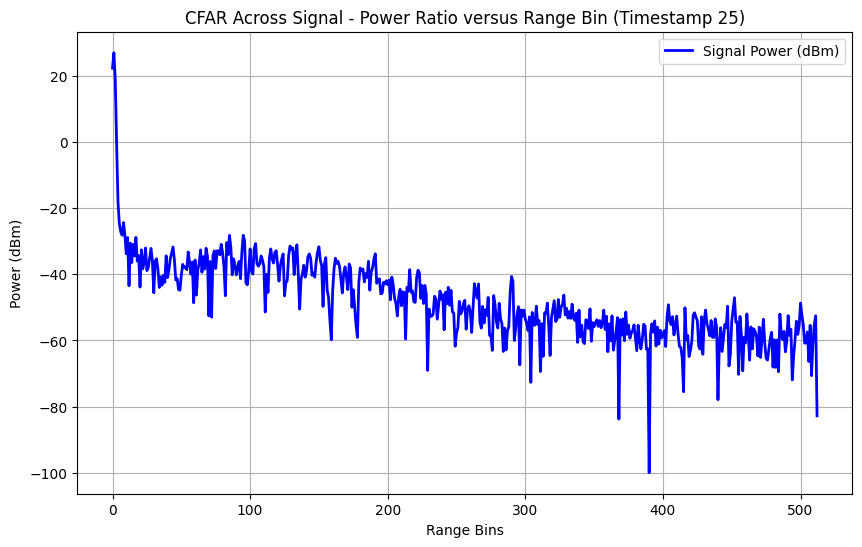

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def plot_signal_in_dBm(signal_power, timestamp_index):
    """
    Plots signal power in dBm across range bins for a singular timestamp.

    Parameters:
    signal_power (np.ndarray): The signal power data (time x range bins), assumed to be in dBm.
    timestamp_index (int): The index of the timestamp to plot.
    """
    # Extract signal power for the specific timestamp (across all range bins)
    signal_power_time = signal_power[timestamp_index, :]
    
    # Plot Signal Power in dBm for the selected timestamp
    plt.figure(figsize=(10, 6))
    plt.plot(signal_power_time, label='Signal Power (dBm)', color='blue', lw=2)
    
    plt.title(f'CFAR Across Signal - Power Ratio versus Range Bin (Timestamp {timestamp_index})')
    plt.xlabel('Range Bins')
    plt.ylabel('Power (dBm)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
timestamp_index = 25  # The timestamp you want to analyze

# Assuming I1_data is (224, 512) and already in dBm
I1_data = fd_data[:, :, 0]  # Extract I1 signal in dBm

# Plot signal power in dBm for a single timestamp across range bins
plot_signal_in_dBm(I1_data, timestamp_index)


# CFAR against a Range Bin
So it's all samples in a range bin over time

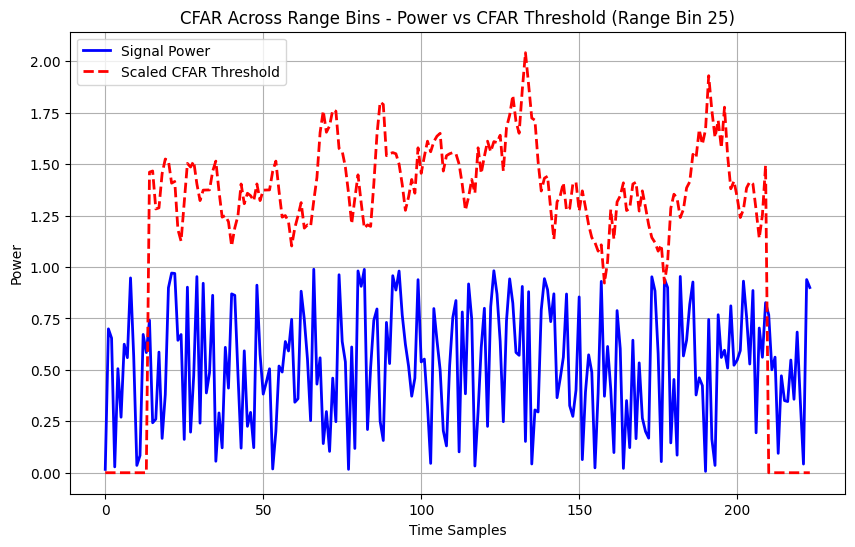

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def plot_signal_power_vs_scaled_threshold(signal_power, range_bin_index, num_training=10, num_guard=5, base_threshold=10, range_factor=1.5, x_bins=50):
    """
    Plots signal power and range-scaled CFAR threshold over time for a singular range bin.

    Parameters:
    signal_power (np.ndarray): The signal power data (time x range bins).
    range_bin_index (int): The index of the range bin to plot.
    num_training (int): Number of training cells on each side.
    num_guard (int): Number of guard cells on each side.
    base_threshold (float): Base threshold in dBm.
    range_factor (float): Factor to increase the threshold for lower range bins.
    x_bins (int): Number of range bins to apply the increased threshold.
    """
    # Extract signal power for the specific range bin
    signal_power_bin = signal_power[:, range_bin_index]
    
    # Initialize an array to store the calculated threshold over time
    calculated_threshold = np.zeros(signal_power_bin.shape)
    
    # Calculate the threshold over time for the selected range bin
    for t in range(num_training + num_guard, len(signal_power_bin) - (num_training + num_guard)):
        # Apply range-dependent scaling for the first 'x_bins' bins
        if range_bin_index < x_bins:
            range_scaled_threshold = base_threshold + range_factor / (range_bin_index + 1)
            threshold_linear = 10**(range_scaled_threshold / 10)
        else:
            # Use base threshold for bins after 'x_bins'
            threshold_linear = 10**(base_threshold / 10)
        
        # Calculate the noise level using leading and lagging training cells
        leading_noise = np.sum(signal_power_bin[t - num_training - num_guard : t - num_guard])
        lagging_noise = np.sum(signal_power_bin[t + num_guard + 1 : t + num_guard + 1 + num_training])
        
        # Use the smallest noise estimate
        total_noise = min(leading_noise, lagging_noise) / num_training
        
        # Store the calculated threshold
        calculated_threshold[t] = total_noise * threshold_linear
    
    # Plot Signal Power vs. Scaled Threshold
    plt.figure(figsize=(10, 6))
    plt.plot(signal_power_bin, label='Signal Power', color='blue', lw=2)
    plt.plot(calculated_threshold, label='Scaled CFAR Threshold', color='red', lw=2, linestyle='--')
    
    plt.title(f'CFAR Across Range Bins - Power vs CFAR Threshold (Range Bin {range_bin_index})')
    plt.xlabel('Time Samples')
    plt.ylabel('Power')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
range_bin_index = 25  # The range bin you want to analyze

# Assuming signal_power is (224, 513)
signal_power = np.random.rand(224, 513)  # Example random signal power data

# Plot signal power vs range-scaled threshold for a single range bin
plot_signal_power_vs_scaled_threshold(signal_power, range_bin_index, num_training=10, num_guard=4, base_threshold=4, range_factor=20, x_bins=50)


# Plotting Tracks!!!

In [113]:
from radar_object_tracking.cfar import get_range_bin_for_indexs
from tracking.ObjectTracking import ObjectTrackingExtendedObjectGNN
from datetime import timedelta, datetime
import time

starting_time = time.time()
tracking = ObjectTrackingExtendedObjectGNN(start_time=starting_time,noise_covar=[3,3], default_cov=[3, 0.5,3, 0.5], path_min_points=5, expected_velocity=0.5, cluster_distance=0.5, min_detections_to_cluster=1, track_tail_length=0.01)

detectionsRx1 = caso_cfar_time_result_rx1 # combined_detection_rx1 # combined_detection_rx1 # combined_detection # cfar_result_rx1 # combined_detection # caso_cfar_time_result
detectionsRx2 = caso_cfar_time_result_rx2 # combined_detection_rx2 # combined_detection # cfar_result_rx2 # combined_detection # caso_cfar_time_result

# Get the number of samples (first dimension)
num_samples = combined_detection.shape[0]

# Iterate through each sample
for i in range(num_samples):
    
    detectionsRx1_i = detectionsRx1[i]
    detectionsRx2_i = detectionsRx2[i]
    
    angles = fd_data[i, :, 7]
    angles_mask = np.where((angles == 90) | (angles == -90))
    
    detectionsRx1_i[angles_mask] = 0
    detectionsRx2_i[angles_mask] = 0
    
    detectionsTotal = np.logical_or(detectionsRx1_i, detectionsRx2_i).astype(int)
    detectionIndexes = np.where(detectionsTotal == 1)[0]
    
    detectionsDistanceArray = get_range_bin_for_indexs(detectionIndexes, RANGE_BIN_RESOLUTION)
    detectionsAngleDeg = angles[detectionIndexes]

    # Convert angles from degrees to radians
    detectionsAngleRad = np.radians(detectionsAngleDeg)
    
    if len(detectionsAngleDeg) > 0 and (len(detectionsDistanceArray) == len(detectionsAngleDeg)):
        # Calculate x and y coordinates
        x_coords = detectionsDistanceArray * np.cos(detectionsAngleRad)
        y_coords = detectionsDistanceArray * np.sin(detectionsAngleRad)
        
        # Make an array of [x, 1, y, 1] for each of the x, y coordinates
        detectionsXY = np.column_stack((x_coords, np.ones_like(x_coords), y_coords, np.ones_like(y_coords)))
        
        timeplus = starting_time + timedelta(seconds=i*0.245).total_seconds()
        timeplus_datetime = datetime.fromtimestamp(timeplus)
        tracking.update_tracks(detectionsXY, timeplus_datetime)
    
tracking.show_tracks_plot()  

/usr/local/lib/python3.10/dist-packages/stonesoup/plotter.py:2216: UserWarning:

Timesteps are not equally spaced, so the passage of time is not linear



Done plotting.
